In [33]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import glob


import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [34]:
all_files=glob.glob('./PopularAIresearch/my*xls')

In [35]:
all_files_data=[]

In [36]:
for file in all_files:
    df = pd.read_excel(file)
    all_files_data.append(df)
print(len(all_files_data))

10


In [37]:
all_files_data_concat=pd.concat(all_files_data, axis=0, ignore_index=True)

In [38]:
all_files_data_concat.head()

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Using AI to Teach AI: Lessons from an Online A...,"Goel, Ashok K.; Joyner, David A.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2017
1,NaN,2,ai@work: How does business use AI technology?,unknown,"KNOWLEDGE TECHNOLOGY, INC.",1997
2,NaN,3,The AI Impacts on CIM-Concepts,"Marik, V.; Lazansky, J.; Stepankova, O.",IEEE Computer Society Press,1993
3,NaN,4,Editorial: AI Education for the World,"Goel, Ashok",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2017
4,NaN,5,AI Controlled High Level Petri Nets in Simulat...,"Javor, A.",IEEE Computer Society Press,1993


In [39]:
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   번호          1000 non-null   int64  
 2   제목          1000 non-null   object 
 3   저자          1000 non-null   object 
 4   출판사         1000 non-null   object 
 5   출판일         1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [40]:
all_files_data_concat.to_csv('./PopularAIResearch/total_concat.csv', encoding='utf8', index=False)

In [41]:
df=pd.read_csv('./PopularAIResearch/total_concat.csv', encoding='utf8')

In [42]:
df.head(10)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Using AI to Teach AI: Lessons from an Online A...,"Goel, Ashok K.; Joyner, David A.",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2017
1,NaN,2,ai@work: How does business use AI technology?,unknown,"KNOWLEDGE TECHNOLOGY, INC.",1997
2,NaN,3,The AI Impacts on CIM-Concepts,"Marik, V.; Lazansky, J.; Stepankova, O.",IEEE Computer Society Press,1993
3,NaN,4,Editorial: AI Education for the World,"Goel, Ashok",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2017
4,NaN,5,AI Controlled High Level Petri Nets in Simulat...,"Javor, A.",IEEE Computer Society Press,1993
5,NaN,6,The role of big data and AI in marketing and a...,unknown,PHARMACEUTICAL MARKETING,2017
6,NaN,7,Introduction: Artificial Intelligence Education,"Wollowski, Michael; Neller, Todd; Boerkoel, ...",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2017
7,NaN,8,AI4COVID-19: AI enabled preliminary diagnosis ...,"Imran, Ali; Posokhova, Iryna; Qureshi, Haneya ...",Elsevier Science B.V. Amsterdam,2020
8,NaN,9,Music Education: An Artificial Intelligence Pe...,"Smith, M.;Miranda, E.;Anderson, T.;Holland, S.",Univ,1993
9,NaN,10,StarCraft AI Competition: A Step Toward Human-...,"Farooq, Sehar Shahzad; Oh, In-Suk; Kim, Man...",AAAI AMERICAN ASSOCIATION OF ARTIFICIAL,2016


# 전처리

In [43]:
# 제목 추출
all_titles=df['제목']

In [44]:
all_titles

0      Using AI to Teach AI: Lessons from an Online A...
1          ai@work: How does business use AI technology?
2                         The AI Impacts on CIM-Concepts
3                  Editorial: AI Education for the World
4      AI Controlled High Level Petri Nets in Simulat...
                             ...                        
995    The Effect of T Cell Subsets and NK Cell with ...
996    AI and IoT-Enabled Smart Exoskeleton System fo...
997    Dialogic Learning: Negotiation and Argumentati...
998    From AI to SciTS: Team Science and Research In...
999          Imaging: AI transforms image reconstruction
Name: 제목, Length: 1000, dtype: object

In [45]:
stopwords=set(stopwords.words('english'))

In [46]:
lemma=WordNetLemmatizer() #fly, flies, flied  ==> fly

In [47]:
words=[] # 전처리한 결과를 모을 리스트

In [48]:
for title in all_titles:
    pre=re.sub(r"[^a-zA-Z]+", " ", str(title)) # 글자가 아닌 것은 공백으로 대체
    pre=word_tokenize(pre.lower()) # 모든 글자를 소문자로 변경 후 토큰화
    pre=[w for w in pre if w not in stopwords]  # 불용어 처리
    pre = [lemma.lemmatize(w) for w in pre] # 표제어 추출(단어의 원형)
    
    words+=pre # 하나의 리스트로 합치기

In [49]:
words

['using',
 'ai',
 'teach',
 'ai',
 'lesson',
 'online',
 'ai',
 'class',
 'ai',
 'work',
 'business',
 'use',
 'ai',
 'technology',
 'ai',
 'impact',
 'cim',
 'concept',
 'editorial',
 'ai',
 'education',
 'world',
 'ai',
 'controlled',
 'high',
 'level',
 'petri',
 'net',
 'simulating',
 'fm',
 'role',
 'big',
 'data',
 'ai',
 'marketing',
 'advertising',
 'introduction',
 'artificial',
 'intelligence',
 'education',
 'ai',
 'covid',
 'ai',
 'enabled',
 'preliminary',
 'diagnosis',
 'covid',
 'cough',
 'sample',
 'via',
 'app',
 'music',
 'education',
 'artificial',
 'intelligence',
 'perspective',
 'starcraft',
 'ai',
 'competition',
 'step',
 'toward',
 'human',
 'level',
 'ai',
 'real',
 'time',
 'strategy',
 'game',
 'modelling',
 'immune',
 'memory',
 'prediction',
 'computation',
 'successful',
 'application',
 'artificial',
 'intelligence',
 'petroleum',
 'industry',
 'explicit',
 'self',
 'esteem',
 'relative',
 'implicit',
 'self',
 'esteem',
 'global',
 'implicit',
 'self',


In [51]:
count = Counter(words)

In [52]:
count.most_common(20)

[('ai', 585),
 ('learning', 152),
 ('intelligence', 102),
 ('artificial', 98),
 ('based', 91),
 ('system', 89),
 ('machine', 79),
 ('using', 48),
 ('technology', 47),
 ('data', 47),
 ('model', 45),
 ('study', 44),
 ('application', 43),
 ('human', 37),
 ('effect', 37),
 ('education', 35),
 ('research', 34),
 ('analysis', 32),
 ('approach', 30),
 ('robot', 28)]

In [56]:
word_count=dict() # 일정 빈도수 이상만을 담을 딕셔너리

In [57]:
# 빈도수가 20 이하인 것은 목록에서 제거
word_count=dict()
for tag, counts in count.most_common(50):
    if(counts>20):
        word_count[tag]=counts

In [58]:
word_count

{'ai': 585,
 'learning': 152,
 'intelligence': 102,
 'artificial': 98,
 'based': 91,
 'system': 89,
 'machine': 79,
 'using': 48,
 'technology': 47,
 'data': 47,
 'model': 45,
 'study': 44,
 'application': 43,
 'human': 37,
 'effect': 37,
 'education': 35,
 'research': 34,
 'analysis': 32,
 'approach': 30,
 'robot': 28,
 'knowledge': 25,
 'case': 25,
 'de': 25,
 'perspective': 24,
 'information': 24,
 'weiwei': 24,
 'new': 24,
 'development': 23,
 'social': 23,
 'design': 22,
 'game': 21,
 'teaching': 21,
 'environment': 21}

In [59]:
# 주제와 더무 일치하는 단어 삭제
del word_count['ai']

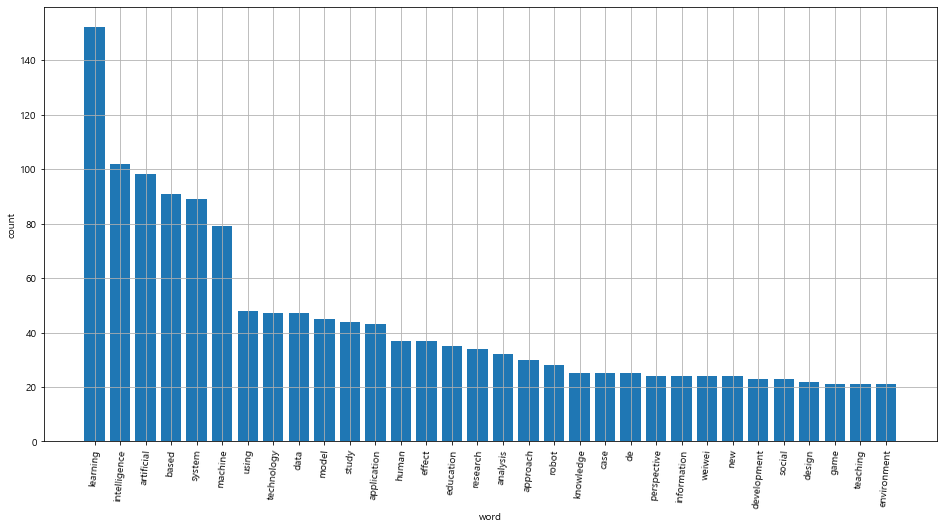

In [60]:
plt.figure(figsize=(16,8))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)
plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')
plt.show()